In [10]:
# Import Matplotlib, pandas, and plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

Importing the CSV file brasil-real-estate.csv into the DataFrame df

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Data/brasil-real-estate.csv')
df1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


Dropping all rows with NaN values from the DataFrame df

In [15]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 631.7+ KB


Using the "lat-lon" column to create two separate columns in df: "lat" and "lon"

In [16]:
df[["lat","lon"]] = df["lat-lon"].str.split(',',expand=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 0 to 12833
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
 6   lat                      11551 non-null  float64
 7   lon                      11551 non-null  float64
dtypes: float64(3), object(5)
memory usage: 812.2+ KB


Using the "place_with_parent_names" column to create a "state" column for df

In [17]:
df['state'] = df['place_with_parent_names'].str.split('|',expand=True)[2]

Transforming the "price_usd" column of df1 so that all values are floating-point numbers instead of strings.

In [18]:
df['price_usd'] = df['price_usd'].str.replace('$','',regex=False).str.replace(',','').astype(float)

Dropping the residual columns ( "lat-lon" and "place_with_parent_names" )

In [19]:
df.drop(columns=['lat-lon','place_with_parent_names'],inplace=True)

##Exploring the data


Creating a scatter_mapbox showing the location of the properties and coloring them based of the prices in df

In [25]:
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    color='price_usd',
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=3
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Using the describe method to create a DataFrame summary_stats with the summary statistics for the "area_m2" and "price_usd" columns.

In [26]:
summary_stats = df[["area_m2","price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,11551.000000,11551.000000
mean,116.695264,181843.221930
std,48.186630,96603.990393
min,53.000000,74892.340000
25%,78.000000,109217.990000
50%,105.000000,152905.190000
75%,145.000000,224677.020000
max,252.000000,524246.390000


Creating a histogram of "price_usd"

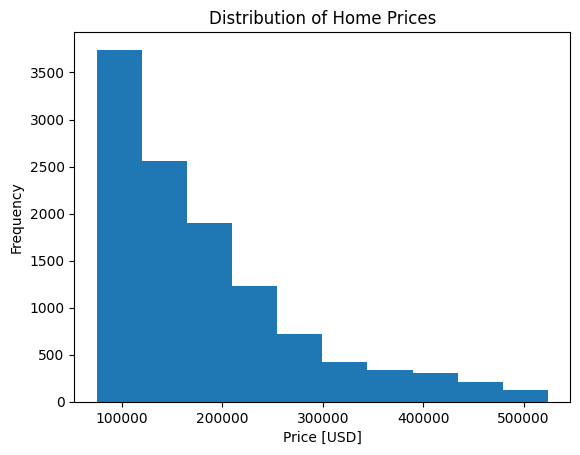

In [27]:
# Build histogram
plt.hist(df['price_usd'])

# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices");


Looking at our histogram, we can see that price skews right. In other words, there are more houses at the lower end of the distribution  than at the higher end.

 Creating a horizontal boxplot of "area_m2"

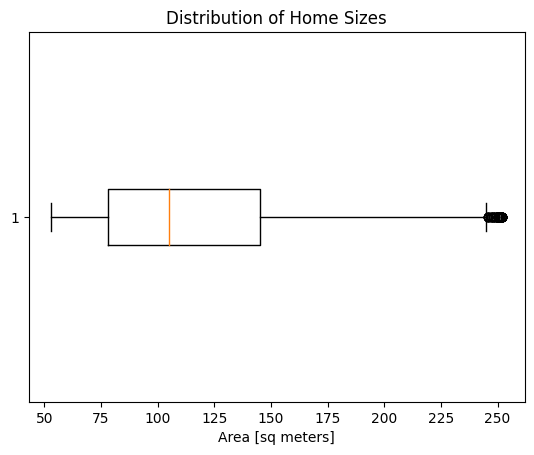

In [28]:
# Build box plot
plt.boxplot(df['area_m2'],vert=False)


# Label x-axis
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");


Using the groupby method to create a Series named mean_price_by_region that shows the mean home price in each region in Brazil, sorted from smallest to largest.

In [29]:
mean_price_by_region = df.groupby('region')['price_usd'].mean().sort_values()
mean_price_by_region

region
South           164168.840031
Central-West    178596.283663
North           182761.422871
Northeast       185993.562957
Southeast       191811.451904
Name: price_usd, dtype: float64

"mean_price_by_region" Barchart

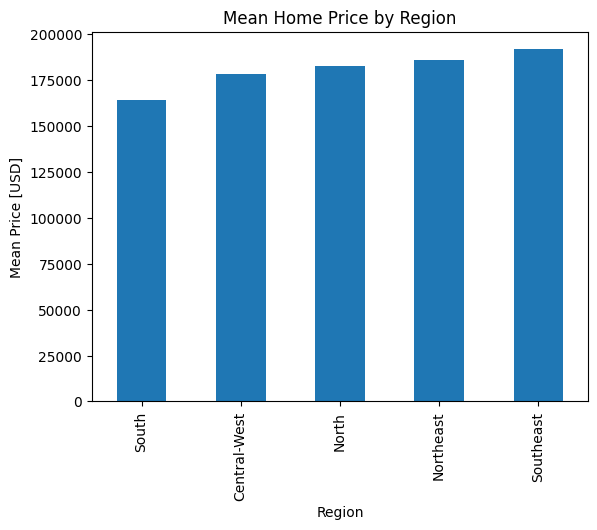

In [30]:
mean_price_by_region.plot(kind='bar',xlabel="Region",ylabel="Mean Price [USD]",title="Mean Home Price by Region");

###Shifting the focus only to the southern region of Brazil

Creating a DataFrame df_south that contains all the homes from df that are in the "South" region

In [31]:
df_south = df[df['region']=="South"]
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state
9304,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
9305,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
9306,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
9307,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
9308,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


counnting the number of properties by state

In [32]:
homes_by_state = df_south['state'].value_counts()
homes_by_state

Paraná    2544
Name: state, dtype: int64

Creating a scatter plot showing price vs. area for the state of Paraná

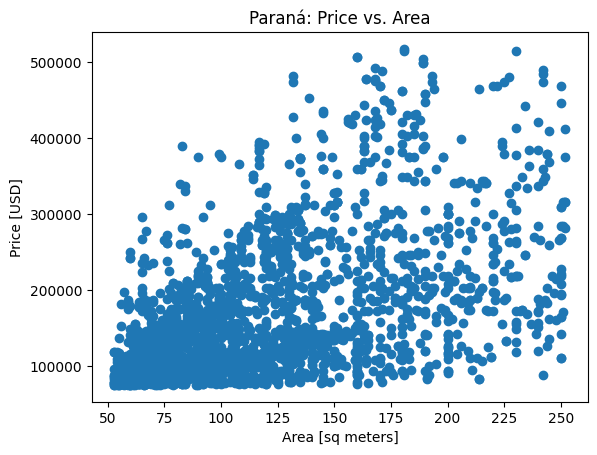

In [33]:
# Build scatter plot
plt.scatter(x=df_south.area_m2,y=df_south.price_usd)
# Label axes
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
# Add title
plt.title("Paraná: Price vs. Area");

*This exploratory data analysis (EDA) notebook has provided valuable insights into the dataset "brasil-real-estate.csv." We began by importing the data into the DataFrame, followed by visualizing the geographic distribution of properties using a scatter_mapbox, where color represented price variations. Subsequently, we delved into the price distribution with a histogram and examined the area distribution using a horizontal boxplot. The "mean_price_by_region" bar chart helped us understand price trends across regions. Finally, our scatter plot for the state of Paraná showcased the relationship between price and area. This comprehensive EDA lays a solid foundation for more in-depth analysis and decision-making in the field of data science.*